# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [2]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [3]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print ("xs:", xs,'\n')
print ("xs indexes:",xs.index,'\n')
# Values of the Series are actually a numpy array
print ("xs values:", xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')
print (xs[['d', 'f', 'h']], '\n')
print (type(xs[['d', 'f', 'h']]), '\n')

xs: a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

xs indexes: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

xs values: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 

<class 'pandas.core.series.Series'> 



In [4]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [5]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)


b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that **operations between Series automatically align the data based on label**. Thus, you can write computations without considering whether the Series involved have the same labels.

In [6]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print(s)
s1 = s[1:] + s[:-1]
print(s1)

s2 = s[1:].sort_values() + s[:-1]
print(s2)



a    1.813157
b    0.749079
c   -1.229135
d    0.502552
e   -1.694962
dtype: float64
a         NaN
b    1.498158
c   -2.458270
d    1.005103
e         NaN
dtype: float64
a         NaN
b    1.498158
c   -2.458270
d    1.005103
e         NaN
dtype: float64


### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas has a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.date_range()`

In [7]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
print(date)

date = dt.datetime(2021,11,22,12,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 22 2021'
# or alternatively
date = '22/11/2021 12:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


2021-11-27
2021-11-22 12:45:10.000015
22/11/2021 12:45:00
DatetimeIndex(['2021-11-22 12:45:00', '2021-11-23 12:45:00',
               '2021-11-24 12:45:00', '2021-11-25 12:45:00',
               '2021-11-26 12:45:00', '2021-11-27 12:45:00',
               '2021-11-28 12:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2021-11-22 12:45:00', '2021-11-22 12:45:01',
               '2021-11-22 12:45:02', '2021-11-22 12:45:03',
               '2021-11-22 12:45:04', '2021-11-22 12:45:05',
               '2021-11-22 12:45:06', '2021-11-22 12:45:07',
               '2021-11-22 12:45:08', '2021-11-22 12:45:09',
               ...
               '2021-11-22 13:44:50', '2021-11-22 13:44:51',
               '2021-11-22 13:44:52', '2021-11-22 13:44:53',
               '2021-11-22 13:44:54', '2021-11-22 13:44:55',
               '2021-11-22 13:44:56', '2021-11-22 13:44:57',
               '2021-11-22 13:44:58', '2021-11-22 13:44:59'],
              dtype='datetime64[ns]', leng

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset.

Timestamp is the pandas equivalent of python’s Datetime and is interchangeable with it in most cases. 

In [8]:
tstamp = pd.Timestamp(dt.datetime(2020, 11, 9))

# internally it counts the nanoseconds from January 1st 19
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)
print(tstamp)

# when creating a timestamp the format can be explicitly passed
ts = pd.to_datetime('2010/11/12', format='%Y/%m/%d')
print (type(ts))
print (ts.value)
ts = pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')
print (ts)
print (ts.value)



1604880000000000000
2020-11-09 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1289520000000000000
2010-11-12 00:00:00
1289520000000000000


A standard series can be created and (range of) elements can be used as indexes

In [68]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2021-11-22':'2021-11-23'], '\n') # Note - includes end time


2021-11-22 12:45:00    10.132424
2021-11-23 12:45:00     8.662308
2021-11-24 12:45:00     9.144662
2021-11-25 12:45:00     9.919395
Freq: D, dtype: float64 

2021-11-22 12:45:00    10.132424
2021-11-23 12:45:00     8.662308
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [69]:
pd.to_datetime([5, 2, 3, 4], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-08', '1980-02-05', '1980-02-06', '1980-02-07'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

**Each column in a DataFrame is a Series object.** (labels)

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatetimeIndex object as index:

In [11]:
entries=10
dates=pd.date_range('11/22/2021 12:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries, 4), index=dates, columns=['A','B','C','D'])
df


,A,B,C,D
2021-11-22 12:45:00,0.882022,1.343493,-0.526947,0.237252
2021-11-22 13:45:00,0.968001,-1.001673,-1.008078,0.676000
2021-11-22 14:45:00,1.050900,-1.031300,-1.017639,-1.103833
2021-11-22 15:45:00,-2.081729,2.601408,0.046775,-0.336363
2021-11-22 16:45:00,-0.559983,-1.949583,1.810683,0.592354
2021-11-22 17:45:00,0.854160,-0.277876,-1.777313,-0.150642
2021-11-22 18:45:00,0.291575,-0.377111,0.015952,0.720946
2021-11-22 19:45:00,-0.105940,-0.402859,-1.792263,-0.298145
2021-11-22 20:45:00,-1.105985,0.117562,0.502308,-0.347761
2021-11-22 21:45:00,-1.312737,-0.159445,0.805538,0.140735


or by means of a dictionary:


In [12]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
df2

# check what happens if D and E had different lenghts (error)

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [13]:
df.head(2)

,A,B,C,D
2021-11-22 12:45:00,0.882022,1.343493,-0.526947,0.237252
2021-11-22 13:45:00,0.968001,-1.001673,-1.008078,0.676000


In [14]:
df.tail(4)

,A,B,C,D
2021-11-22 18:45:00,0.291575,-0.377111,0.015952,0.720946
2021-11-22 19:45:00,-0.105940,-0.402859,-1.792263,-0.298145
2021-11-22 20:45:00,-1.105985,0.117562,0.502308,-0.347761
2021-11-22 21:45:00,-1.312737,-0.159445,0.805538,0.140735


In [15]:
df.index

DatetimeIndex(['2021-11-22 12:45:00', '2021-11-22 13:45:00',
               '2021-11-22 14:45:00', '2021-11-22 15:45:00',
               '2021-11-22 16:45:00', '2021-11-22 17:45:00',
               '2021-11-22 18:45:00', '2021-11-22 19:45:00',
               '2021-11-22 20:45:00', '2021-11-22 21:45:00'],
              dtype='datetime64[ns]', freq='H')

In [16]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [17]:
df.values

array([[ 0.88202157,  1.34349265, -0.52694654,  0.23725174],
       [ 0.96800086, -1.00167262, -1.00807772,  0.6759999 ],
       [ 1.0509    , -1.03130039, -1.01763902, -1.10383273],
       [-2.08172942,  2.60140821,  0.04677453, -0.33636267],
       [-0.55998311, -1.94958293,  1.81068289,  0.59235447],
       [ 0.85416025, -0.27787567, -1.77731315, -0.15064213],
       [ 0.29157474, -0.3771109 ,  0.01595172,  0.72094573],
       [-0.10594025, -0.40285899, -1.79226306, -0.29814474],
       [-1.10598459,  0.11756213,  0.50230808, -0.34776124],
       [-1.31273657, -0.15944512,  0.80553776,  0.14073506]])

In [18]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,-0.111972,-0.113738,-0.294098,0.013054
std,1.111230,1.279397,1.155557,0.574081
min,-2.081729,-1.949583,-1.792263,-1.103833
25%,-0.969484,-0.851969,-1.015249,-0.326808
50%,0.092817,-0.327493,-0.255497,-0.004954
75%,0.875056,0.048310,0.388425,0.503579
max,1.050900,2.601408,1.810683,0.720946


In [19]:
df.T

,2021-11-22 12:45:00,2021-11-22 13:45:00,2021-11-22 14:45:00,2021-11-22 15:45:00,2021-11-22 16:45:00,2021-11-22 17:45:00,2021-11-22 18:45:00,2021-11-22 19:45:00,2021-11-22 20:45:00,2021-11-22 21:45:00
A,0.882022,0.968001,1.050900,-2.081729,-0.559983,0.854160,0.291575,-0.105940,-1.105985,-1.312737
B,1.343493,-1.001673,-1.031300,2.601408,-1.949583,-0.277876,-0.377111,-0.402859,0.117562,-0.159445
C,-0.526947,-1.008078,-1.017639,0.046775,1.810683,-1.777313,0.015952,-1.792263,0.502308,0.805538
D,0.237252,0.676000,-1.103833,-0.336363,0.592354,-0.150642,0.720946,-0.298145,-0.347761,0.140735


In [20]:
df.sort_index(axis=0,ascending=True)

,A,B,C,D
2021-11-22 12:45:00,0.882022,1.343493,-0.526947,0.237252
2021-11-22 13:45:00,0.968001,-1.001673,-1.008078,0.676000
2021-11-22 14:45:00,1.050900,-1.031300,-1.017639,-1.103833
2021-11-22 15:45:00,-2.081729,2.601408,0.046775,-0.336363
2021-11-22 16:45:00,-0.559983,-1.949583,1.810683,0.592354
2021-11-22 17:45:00,0.854160,-0.277876,-1.777313,-0.150642
2021-11-22 18:45:00,0.291575,-0.377111,0.015952,0.720946
2021-11-22 19:45:00,-0.105940,-0.402859,-1.792263,-0.298145
2021-11-22 20:45:00,-1.105985,0.117562,0.502308,-0.347761
2021-11-22 21:45:00,-1.312737,-0.159445,0.805538,0.140735


In [21]:
df.sort_values(by="C")

,A,B,C,D
2021-11-22 19:45:00,-0.105940,-0.402859,-1.792263,-0.298145
2021-11-22 17:45:00,0.854160,-0.277876,-1.777313,-0.150642
2021-11-22 14:45:00,1.050900,-1.031300,-1.017639,-1.103833
2021-11-22 13:45:00,0.968001,-1.001673,-1.008078,0.676000
2021-11-22 12:45:00,0.882022,1.343493,-0.526947,0.237252
2021-11-22 18:45:00,0.291575,-0.377111,0.015952,0.720946
2021-11-22 15:45:00,-2.081729,2.601408,0.046775,-0.336363
2021-11-22 20:45:00,-1.105985,0.117562,0.502308,-0.347761
2021-11-22 21:45:00,-1.312737,-0.159445,0.805538,0.140735
2021-11-22 16:45:00,-0.559983,-1.949583,1.810683,0.592354


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [22]:
## standard and safe
print (df['A'],'\n')
# df['A'] is a series

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)
# the label becomes a method

2021-11-22 12:45:00    0.882022
2021-11-22 13:45:00    0.968001
2021-11-22 14:45:00    1.050900
2021-11-22 15:45:00   -2.081729
2021-11-22 16:45:00   -0.559983
2021-11-22 17:45:00    0.854160
2021-11-22 18:45:00    0.291575
2021-11-22 19:45:00   -0.105940
2021-11-22 20:45:00   -1.105985
2021-11-22 21:45:00   -1.312737
Freq: H, Name: A, dtype: float64 

2021-11-22 12:45:00    0.882022
2021-11-22 13:45:00    0.968001
2021-11-22 14:45:00    1.050900
2021-11-22 15:45:00   -2.081729
2021-11-22 16:45:00   -0.559983
2021-11-22 17:45:00    0.854160
2021-11-22 18:45:00    0.291575
2021-11-22 19:45:00   -0.105940
2021-11-22 20:45:00   -1.105985
2021-11-22 21:45:00   -1.312737
Freq: H, Name: A, dtype: float64


In [79]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2021-11-22 12:45:00":"2021-11-22 14:45:00"]) # notice the last row is included

                            A         B         C  D    E  E prime    cosine
2021-11-22 12:45:00  0.000000  1.343493 -0.526947  5  0.0        0  1.000000
2021-11-22 13:45:00  0.968001 -1.001673 -1.008078  5  0.5        2  0.999962
2021-11-22 14:45:00  1.050900 -1.031300 -1.017639  5  1.0        4  0.999848
                            A         B         C  D    E  E prime    cosine
2021-11-22 12:45:00  0.000000  1.343493 -0.526947  5  0.0        0  1.000000
2021-11-22 13:45:00  0.968001 -1.001673 -1.008078  5  0.5        2  0.999962
2021-11-22 14:45:00  1.050900 -1.031300 -1.017639  5  1.0        4  0.999848


### Selection by label

In [24]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]
# this is a series

A    0.882022
B    1.343493
C   -0.526947
D    0.237252
Name: 2021-11-22 12:45:00, dtype: float64

In [76]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]
#a=df.loc[:,['A','B']]

# df[:, 0:1] invalid expression
# df[0, 1] invalid expression

,A,B
2021-11-22 12:45:00,0.000000,1.343493
2021-11-22 13:45:00,0.968001,-1.001673
2021-11-22 14:45:00,1.050900,-1.031300
2021-11-22 15:45:00,-2.081729,2.601408
2021-11-22 16:45:00,-0.559983,-1.949583
2021-11-22 17:45:00,0.854160,-0.277876
2021-11-22 18:45:00,0.291575,-0.377111
2021-11-22 19:45:00,-0.105940,-0.402859
2021-11-22 20:45:00,-1.105985,0.117562
2021-11-22 21:45:00,-1.312737,-0.159445


In [26]:
# showing label slicing, both endpoints are included:
df.loc['2021-11-22 16:45:00':'2021-11-22 18:45:00',['A','B']]

,A,B
2021-11-22 16:45:00,-0.559983,-1.949583
2021-11-22 17:45:00,0.854160,-0.277876
2021-11-22 18:45:00,0.291575,-0.377111


In [27]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

0.9680008629168332
0.9680008629168332


### Selecting by position

In [80]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# print(df[3]) gives error

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

A         -2.081729
B          2.601408
C          0.046775
D          5.000000
E          1.500000
E prime    6.000000
cosine     0.999657
Name: 2021-11-22 15:45:00, dtype: float64 

                            A         B
2021-11-22 15:45:00 -2.081729  2.601408
2021-11-22 16:45:00 -0.559983 -1.949583


In [29]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2021-11-22 13:45:00,0.968001,-1.008078
2021-11-22 14:45:00,1.050900,-1.017639
2021-11-22 16:45:00,-0.559983,1.810683


In [30]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])


                            A         B         C         D
2021-11-22 13:45:00  0.968001 -1.001673 -1.008078  0.676000
2021-11-22 14:45:00  1.050900 -1.031300 -1.017639 -1.103833 

                            B         C
2021-11-22 12:45:00  1.343493 -0.526947
2021-11-22 13:45:00 -1.001673 -1.008078
2021-11-22 14:45:00 -1.031300 -1.017639
2021-11-22 15:45:00  2.601408  0.046775
2021-11-22 16:45:00 -1.949583  1.810683
2021-11-22 17:45:00 -0.277876 -1.777313
2021-11-22 18:45:00 -0.377111  0.015952
2021-11-22 19:45:00 -0.402859 -1.792263
2021-11-22 20:45:00  0.117562  0.502308
2021-11-22 21:45:00 -0.159445  0.805538


In [31]:
# selecting an individual element by position
df.iloc[1,1]
df.iat[1,1]


-1.0016726169194263

### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.
Super efficient.

In [32]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

,A,B,C,D
2021-11-22 12:45:00,0.882022,1.343493,-0.526947,0.237252
2021-11-22 15:45:00,-2.081729,2.601408,0.046775,-0.336363
2021-11-22 20:45:00,-1.105985,0.117562,0.502308,-0.347761


In [33]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2021-11-22 12:45:00,0.882022,1.343493,NaN,0.237252
2021-11-22 13:45:00,0.968001,NaN,NaN,0.676000
2021-11-22 14:45:00,1.050900,NaN,NaN,NaN
2021-11-22 15:45:00,NaN,2.601408,0.046775,NaN
2021-11-22 16:45:00,NaN,NaN,1.810683,0.592354
2021-11-22 17:45:00,0.854160,NaN,NaN,NaN
2021-11-22 18:45:00,0.291575,NaN,0.015952,0.720946
2021-11-22 19:45:00,NaN,NaN,NaN,NaN
2021-11-22 20:45:00,NaN,0.117562,0.502308,NaN
2021-11-22 21:45:00,NaN,NaN,0.805538,0.140735


### Setting

Combination of selection and setting of values

In [34]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)


In [35]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,1.343493,-0.526947,5,0.0,0,1.000000
2021-11-22 13:45:00,0.968001,-1.001673,-1.008078,5,0.5,2,0.999962
2021-11-22 14:45:00,1.050900,-1.031300,-1.017639,5,1.0,4,0.999848
2021-11-22 15:45:00,-2.081729,2.601408,0.046775,5,1.5,6,0.999657
2021-11-22 16:45:00,-0.559983,-1.949583,1.810683,5,2.0,8,0.999391
2021-11-22 17:45:00,0.854160,-0.277876,-1.777313,5,2.5,10,0.999048
2021-11-22 18:45:00,0.291575,-0.377111,0.015952,5,3.0,12,0.998630
2021-11-22 19:45:00,-0.105940,-0.402859,-1.792263,5,3.5,14,0.998135
2021-11-22 20:45:00,-1.105985,0.117562,0.502308,5,4.0,16,0.997564
2021-11-22 21:45:00,-1.312737,-0.159445,0.805538,5,4.5,18,0.996917


In [36]:
# another example of global setting
df2=df.copy()

df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,-1.343493,-0.526947,-5,0.0,0,-1.000000
2021-11-22 13:45:00,-0.968001,-1.001673,-1.008078,-5,-0.5,-2,-0.999962
2021-11-22 14:45:00,-1.050900,-1.031300,-1.017639,-5,-1.0,-4,-0.999848
2021-11-22 15:45:00,-2.081729,-2.601408,-0.046775,-5,-1.5,-6,-0.999657
2021-11-22 16:45:00,-0.559983,-1.949583,-1.810683,-5,-2.0,-8,-0.999391
2021-11-22 17:45:00,-0.854160,-0.277876,-1.777313,-5,-2.5,-10,-0.999048
2021-11-22 18:45:00,-0.291575,-0.377111,-0.015952,-5,-3.0,-12,-0.998630
2021-11-22 19:45:00,-0.105940,-0.402859,-1.792263,-5,-3.5,-14,-0.998135
2021-11-22 20:45:00,-1.105985,-0.117562,-0.502308,-5,-4.0,-16,-0.997564
2021-11-22 21:45:00,-1.312737,-0.159445,-0.805538,-5,-4.5,-18,-0.996917


In [37]:
df

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,1.343493,-0.526947,5,0.0,0,1.000000
2021-11-22 13:45:00,0.968001,-1.001673,-1.008078,5,0.5,2,0.999962
2021-11-22 14:45:00,1.050900,-1.031300,-1.017639,5,1.0,4,0.999848
2021-11-22 15:45:00,-2.081729,2.601408,0.046775,5,1.5,6,0.999657
2021-11-22 16:45:00,-0.559983,-1.949583,1.810683,5,2.0,8,0.999391
2021-11-22 17:45:00,0.854160,-0.277876,-1.777313,5,2.5,10,0.999048
2021-11-22 18:45:00,0.291575,-0.377111,0.015952,5,3.0,12,0.998630
2021-11-22 19:45:00,-0.105940,-0.402859,-1.792263,5,3.5,14,0.998135
2021-11-22 20:45:00,-1.105985,0.117562,0.502308,5,4.0,16,0.997564
2021-11-22 21:45:00,-1.312737,-0.159445,0.805538,5,4.5,18,0.996917


In [84]:
df3=df2
df3[df3<0] = -df3
df2 # also modified

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,1.343493,0.526947,5,0.0,0,1.000000
2021-11-22 13:45:00,0.968001,1.001673,1.008078,5,0.5,2,0.999962
2021-11-22 14:45:00,1.050900,1.031300,1.017639,5,1.0,4,0.999848
2021-11-22 15:45:00,2.081729,2.601408,0.046775,5,1.5,6,0.999657
2021-11-22 16:45:00,0.559983,1.949583,1.810683,5,2.0,8,0.999391
2021-11-22 17:45:00,0.854160,0.277876,1.777313,5,2.5,10,0.999048
2021-11-22 18:45:00,0.291575,0.377111,0.015952,5,3.0,12,0.998630
2021-11-22 19:45:00,0.105940,0.402859,1.792263,5,3.5,14,0.998135
2021-11-22 20:45:00,1.105985,0.117562,0.502308,5,4.0,16,0.997564
2021-11-22 21:45:00,1.312737,0.159445,0.805538,5,4.5,18,0.996917


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [38]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to
new_df=df.drop(columns=['E prime'])
new_df

,A,B,C,D,E,cosine
2021-11-22 12:45:00,0.000000,1.343493,-0.526947,5,0.0,1.000000
2021-11-22 13:45:00,0.968001,-1.001673,-1.008078,5,0.5,0.999962
2021-11-22 14:45:00,1.050900,-1.031300,-1.017639,5,1.0,0.999848
2021-11-22 15:45:00,-2.081729,2.601408,0.046775,5,1.5,0.999657
2021-11-22 16:45:00,-0.559983,-1.949583,1.810683,5,2.0,0.999391
2021-11-22 17:45:00,0.854160,-0.277876,-1.777313,5,2.5,0.999048
2021-11-22 18:45:00,0.291575,-0.377111,0.015952,5,3.0,0.998630
2021-11-22 19:45:00,-0.105940,-0.402859,-1.792263,5,3.5,0.998135
2021-11-22 20:45:00,-1.105985,0.117562,0.502308,5,4.0,0.997564
2021-11-22 21:45:00,-1.312737,-0.159445,0.805538,5,4.5,0.996917


In [39]:
# Dropping by raws
# safe and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,1.343493,-0.526947,5,0.0,0,1.000000
2021-11-22 17:45:00,0.854160,-0.277876,-1.777313,5,2.5,10,0.999048
2021-11-22 18:45:00,0.291575,-0.377111,0.015952,5,3.0,12,0.998630
2021-11-22 19:45:00,-0.105940,-0.402859,-1.792263,5,3.5,14,0.998135
2021-11-22 20:45:00,-1.105985,0.117562,0.502308,5,4.0,16,0.997564
2021-11-22 21:45:00,-1.312737,-0.159445,0.805538,5,4.5,18,0.996917


In [40]:
df # not modified

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,1.343493,-0.526947,5,0.0,0,1.000000
2021-11-22 13:45:00,0.968001,-1.001673,-1.008078,5,0.5,2,0.999962
2021-11-22 14:45:00,1.050900,-1.031300,-1.017639,5,1.0,4,0.999848
2021-11-22 15:45:00,-2.081729,2.601408,0.046775,5,1.5,6,0.999657
2021-11-22 16:45:00,-0.559983,-1.949583,1.810683,5,2.0,8,0.999391
2021-11-22 17:45:00,0.854160,-0.277876,-1.777313,5,2.5,10,0.999048
2021-11-22 18:45:00,0.291575,-0.377111,0.015952,5,3.0,12,0.998630
2021-11-22 19:45:00,-0.105940,-0.402859,-1.792263,5,3.5,14,0.998135
2021-11-22 20:45:00,-1.105985,0.117562,0.502308,5,4.0,16,0.997564
2021-11-22 21:45:00,-1.312737,-0.159445,0.805538,5,4.5,18,0.996917


In [41]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2021-11-22 20:45:00"))

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,1.343493,-0.526947,5,0.0,0,1.000000
2021-11-22 13:45:00,0.968001,-1.001673,-1.008078,5,0.5,2,0.999962
2021-11-22 14:45:00,1.050900,-1.031300,-1.017639,5,1.0,4,0.999848
2021-11-22 15:45:00,-2.081729,2.601408,0.046775,5,1.5,6,0.999657
2021-11-22 16:45:00,-0.559983,-1.949583,1.810683,5,2.0,8,0.999391
2021-11-22 17:45:00,0.854160,-0.277876,-1.777313,5,2.5,10,0.999048
2021-11-22 18:45:00,0.291575,-0.377111,0.015952,5,3.0,12,0.998630
2021-11-22 19:45:00,-0.105940,-0.402859,-1.792263,5,3.5,14,0.998135
2021-11-22 21:45:00,-1.312737,-0.159445,0.805538,5,4.5,18,0.996917


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [42]:
df_wNan = df[df>0]
df_wNan

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,NaN,1.343493,NaN,5,NaN,NaN,1.000000
2021-11-22 13:45:00,0.968001,NaN,NaN,5,0.5,2.0,0.999962
2021-11-22 14:45:00,1.050900,NaN,NaN,5,1.0,4.0,0.999848
2021-11-22 15:45:00,NaN,2.601408,0.046775,5,1.5,6.0,0.999657
2021-11-22 16:45:00,NaN,NaN,1.810683,5,2.0,8.0,0.999391
2021-11-22 17:45:00,0.854160,NaN,NaN,5,2.5,10.0,0.999048
2021-11-22 18:45:00,0.291575,NaN,0.015952,5,3.0,12.0,0.998630
2021-11-22 19:45:00,NaN,NaN,NaN,5,3.5,14.0,0.998135
2021-11-22 20:45:00,NaN,0.117562,0.502308,5,4.0,16.0,0.997564
2021-11-22 21:45:00,NaN,NaN,0.805538,5,4.5,18.0,0.996917


In [43]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine


In [88]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,False,True,False,True,False,False,True
2021-11-22 13:45:00,True,False,False,True,True,True,True
2021-11-22 14:45:00,True,False,False,True,True,True,True
2021-11-22 15:45:00,False,True,True,True,True,True,True
2021-11-22 16:45:00,False,False,True,True,True,True,True
2021-11-22 17:45:00,True,False,False,True,True,True,True
2021-11-22 18:45:00,True,False,True,True,True,True,True
2021-11-22 19:45:00,False,False,False,True,True,True,True
2021-11-22 20:45:00,False,True,True,True,True,True,True
2021-11-22 21:45:00,False,False,True,True,True,True,True


In [45]:
# filling missing data (dangerous, but we can do it)
df_wNan.fillna(value=0)

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,1.343493,0.000000,5,0.0,0.0,1.000000
2021-11-22 13:45:00,0.968001,0.000000,0.000000,5,0.5,2.0,0.999962
2021-11-22 14:45:00,1.050900,0.000000,0.000000,5,1.0,4.0,0.999848
2021-11-22 15:45:00,0.000000,2.601408,0.046775,5,1.5,6.0,0.999657
2021-11-22 16:45:00,0.000000,0.000000,1.810683,5,2.0,8.0,0.999391
2021-11-22 17:45:00,0.854160,0.000000,0.000000,5,2.5,10.0,0.999048
2021-11-22 18:45:00,0.291575,0.000000,0.015952,5,3.0,12.0,0.998630
2021-11-22 19:45:00,0.000000,0.000000,0.000000,5,3.5,14.0,0.998135
2021-11-22 20:45:00,0.000000,0.117562,0.502308,5,4.0,16.0,0.997564
2021-11-22 21:45:00,0.000000,0.000000,0.805538,5,4.5,18.0,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [46]:
df_wNan.fillna(method='pad')

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,NaN,1.343493,NaN,5,NaN,NaN,1.000000
2021-11-22 13:45:00,0.968001,1.343493,NaN,5,0.5,2.0,0.999962
2021-11-22 14:45:00,1.050900,1.343493,NaN,5,1.0,4.0,0.999848
2021-11-22 15:45:00,1.050900,2.601408,0.046775,5,1.5,6.0,0.999657
2021-11-22 16:45:00,1.050900,2.601408,1.810683,5,2.0,8.0,0.999391
2021-11-22 17:45:00,0.854160,2.601408,1.810683,5,2.5,10.0,0.999048
2021-11-22 18:45:00,0.291575,2.601408,0.015952,5,3.0,12.0,0.998630
2021-11-22 19:45:00,0.291575,2.601408,0.015952,5,3.5,14.0,0.998135
2021-11-22 20:45:00,0.291575,0.117562,0.502308,5,4.0,16.0,0.997564
2021-11-22 21:45:00,0.291575,0.117562,0.805538,5,4.5,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [47]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

A         -0.200174
B         -0.113738
C         -0.294098
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2021-11-22 12:45:00    0.973792
2021-11-22 13:45:00    1.065459
2021-11-22 14:45:00    1.428830
2021-11-22 15:45:00    2.009444
2021-11-22 16:45:00    2.185787
2021-11-22 17:45:00    2.471146
2021-11-22 18:45:00    2.989864
2021-11-22 19:45:00    3.028153
2021-11-22 20:45:00    3.644493
2021-11-22 21:45:00    3.975753
Freq: H, dtype: float64 



In [48]:
# global operations on columns
df.apply(np.cumsum)

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,1.343493,-0.526947,5,0.0,0,1.000000
2021-11-22 13:45:00,0.968001,0.341820,-1.535024,10,0.5,2,1.999962
2021-11-22 14:45:00,2.018901,-0.689480,-2.552663,15,1.5,6,2.999810
2021-11-22 15:45:00,-0.062829,1.911928,-2.505889,20,3.0,12,3.999467
2021-11-22 16:45:00,-0.622812,-0.037655,-0.695206,25,5.0,20,4.998858
2021-11-22 17:45:00,0.231349,-0.315531,-2.472519,30,7.5,30,5.997906
2021-11-22 18:45:00,0.522923,-0.692642,-2.456567,35,10.5,42,6.996536
2021-11-22 19:45:00,0.416983,-1.095501,-4.248830,40,14.0,56,7.994670
2021-11-22 20:45:00,-0.689002,-0.977939,-3.746522,45,18.0,72,8.992234
2021-11-22 21:45:00,-2.001738,-1.137384,-2.940985,50,22.5,90,9.989152


In [49]:
df

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,1.343493,-0.526947,5,0.0,0,1.000000
2021-11-22 13:45:00,0.968001,-1.001673,-1.008078,5,0.5,2,0.999962
2021-11-22 14:45:00,1.050900,-1.031300,-1.017639,5,1.0,4,0.999848
2021-11-22 15:45:00,-2.081729,2.601408,0.046775,5,1.5,6,0.999657
2021-11-22 16:45:00,-0.559983,-1.949583,1.810683,5,2.0,8,0.999391
2021-11-22 17:45:00,0.854160,-0.277876,-1.777313,5,2.5,10,0.999048
2021-11-22 18:45:00,0.291575,-0.377111,0.015952,5,3.0,12,0.998630
2021-11-22 19:45:00,-0.105940,-0.402859,-1.792263,5,3.5,14,0.998135
2021-11-22 20:45:00,-1.105985,0.117562,0.502308,5,4.0,16,0.997564
2021-11-22 21:45:00,-1.312737,-0.159445,0.805538,5,4.5,18,0.996917


In [50]:
df.apply(lambda x: x.max() - x.min())

A           3.132629
B           4.550991
C           3.602946
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [51]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

2021-11-22 12:45:00    1.343493
2021-11-22 13:45:00   -0.033672
2021-11-22 14:45:00    0.019600
2021-11-22 15:45:00    0.519679
2021-11-22 16:45:00   -2.509566
2021-11-22 17:45:00    0.576285
2021-11-22 18:45:00   -0.085536
2021-11-22 19:45:00   -0.508799
2021-11-22 20:45:00   -0.988422
2021-11-22 21:45:00   -1.472182
Freq: H, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [52]:
# WARNING! link in past notebook was wrong!, (if needed) get the right file from:
# !wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -O ~/data/data_000637.txt

file_name="/Users/Nicola/data/data_000637.txt"
data = pd.read_csv(file_name)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


Let's now do some operations among (elements of) columns

In [53]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [54]:
data['timens']

0          59371.666667
1          59372.500000
2          63848.333333
3          63965.833333
4          69020.833333
               ...     
1310715    19061.666667
1310716    19084.166667
1310717    19100.000000
1310718    19225.000000
1310719    19065.000000
Name: timens, Length: 1310720, dtype: float64

In [55]:
# the old sloooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding rows) is straightforward


In [56]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,1.103457,-0.801953,0.505491,2.692996
1,-1.850004,0.769672,0.090551,-1.145299
2,0.185158,0.376849,-1.602980,0.183270
3,-0.036319,1.297070,-0.950158,-2.081937
4,0.329219,-0.915690,0.233740,0.956610
5,-0.582899,-0.021944,-0.214382,-1.407989
6,-1.820034,-0.767760,-0.444478,0.975457
7,1.159810,1.454155,-0.567536,-0.004543
8,-0.031331,-1.020207,1.047765,-1.327133
9,-0.593296,-0.672661,-0.493235,0.016927


In [90]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
# pieces[0] # it is a dataframe
pieces 

[          0         1         2         3
 0  1.103457 -0.801953  0.505491  2.692996
 1 -1.850004  0.769672  0.090551 -1.145299
 2  0.185158  0.376849 -1.602980  0.183270,
           0         1         2         3
 3 -0.036319  1.297070 -0.950158 -2.081937
 4  0.329219 -0.915690  0.233740  0.956610
 5 -0.582899 -0.021944 -0.214382 -1.407989
 6 -1.820034 -0.767760 -0.444478  0.975457,
           0         1         2         3
 7  1.159810  1.454155 -0.567536 -0.004543
 8 -0.031331 -1.020207  1.047765 -1.327133
 9 -0.593296 -0.672661 -0.493235  0.016927]

In [58]:
# put it back together
#pd.concat(pieces)

# indexes can be ignored
pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,1.103457,-0.801953,0.505491,2.692996
1,-1.850004,0.769672,0.090551,-1.145299
2,0.185158,0.376849,-1.602980,0.183270
3,-0.036319,1.297070,-0.950158,-2.081937
4,0.329219,-0.915690,0.233740,0.956610
5,-0.582899,-0.021944,-0.214382,-1.407989
6,-1.820034,-0.767760,-0.444478,0.975457
7,1.159810,1.454155,-0.567536,-0.004543
8,-0.031331,-1.020207,1.047765,-1.327133
9,-0.593296,-0.672661,-0.493235,0.016927


In [91]:
# appending a single row (as a Series)
s = rdf.iloc[3]
print(s) # it is a series
rdf.append(s, ignore_index=True)
rdf

0   -0.036319
1    1.297070
2   -0.950158
3   -2.081937
Name: 3, dtype: float64


,0,1,2,3
0,1.103457,-0.801953,0.505491,2.692996
1,-1.850004,0.769672,0.090551,-1.145299
2,0.185158,0.376849,-1.602980,0.183270
3,-0.036319,1.297070,-0.950158,-2.081937
4,0.329219,-0.915690,0.233740,0.956610
5,-0.582899,-0.021944,-0.214382,-1.407989
6,-1.820034,-0.767760,-0.444478,0.975457
7,1.159810,1.454155,-0.567536,-0.004543
8,-0.031331,-1.020207,1.047765,-1.327133
9,-0.593296,-0.672661,-0.493235,0.016927


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [60]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
print(left)
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
print(right)
pd.merge(left,right,on="key")

   key  lval
0  foo     1
1  bar     2
   key  rval
0  foo     4
1  bar     5


,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


In [61]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,0.398327,-0.360181
1,bar,one,-1.498057,0.702985
2,foo,two,-0.667589,1.262246
3,bar,three,0.501719,0.451877
4,foo,two,0.134312,0.501259
5,bar,two,0.144699,0.364413
6,foo,one,-0.093004,0.065138
7,foo,three,-2.369577,0.672402


In [96]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).

gdf.groupby('A').sum()

,C,D
A,,
bar,-0.851639,1.519276
foo,-2.597531,2.140863


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [63]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second']) 

first  second
bar    one      -0.818912
       two       0.421088
baz    one       1.140307
       two      -0.437987
foo    one       1.514347
       two       0.176481
qux    one      -1.281295
       two       1.072857
dtype: float64


In [64]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -1.498057  0.702985
    three  0.501719  0.451877
    two    0.144699  0.364413
foo one    0.305324 -0.295044
    three -2.369577  0.672402
    two   -0.533277  1.763505

In [65]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C   -1.498057
            D    0.702985
     three  C    0.501719
            D    0.451877
     two    C    0.144699
            D    0.364413
foo  one    C    0.305324
            D   -0.295044
     three  C   -2.369577
            D    0.672402
     two    C   -0.533277
            D    1.763505
dtype: float64

## Plotting

Just a preview, more on the next lab class!

<AxesSubplot:>

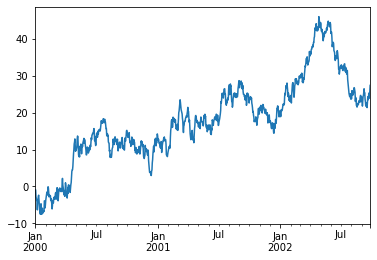

In [66]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 432x288 with 0 Axes>

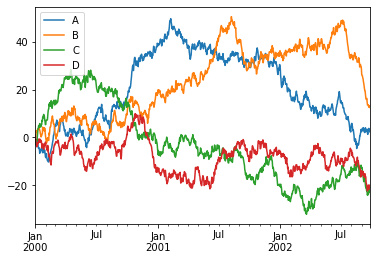

In [98]:
import matplotlib.pyplot as plt

pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
pdf = pdf.cumsum()
plt.figure(); pdf.plot(); plt.legend(loc='best')